<a href="https://colab.research.google.com/github/ddy623/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Deidre Hunt

## Project Overview

## Load and Inspect Data

In [280]:
#import pandas
import pandas as pd
#save file path
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [281]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [282]:
# load in the data as a pandas dataframe
df = pd.read_csv(fname)

In [283]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

How many rows?

In [285]:
len(df)

8523

How many columns?

In [286]:
len(df.columns)

12

What are the datatypes of each variable?

In [287]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there any duplicates? If so, drop any duplicates

In [288]:
# save the filter
duplicated_rows = df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [289]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

4) Identify Missing Values

In [290]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [291]:
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


5)Address the missing values by using a placeholder

In [292]:
# Saving list of column names for object cols
cat_cols = df.select_dtypes('object').columns
cat_cols



Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [293]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns
num_cols



Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [294]:
# Checking which categorical columns had missing values.
df[cat_cols].isna().sum()



Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [295]:
# Using fillna to fill Alley's nulls with "MISSING"
df['Item_Weight'] = df['Item_Weight'].fillna("MISSING")
df['Item_Weight'].value_counts(dropna=False)

MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

In [296]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Missing")
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [297]:
# Filling null values with -1
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()



0

In [298]:
# Filling null values with -1
df['Outlet_Size']  = df['Outlet_Size'].fillna(-1)
df['Outlet_Size'].isna().sum()

0

6) Confirm that there are no missing values after addressing them

In [299]:
df['Item_Weight'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [300]:
df['Item_Weight'].dtype

dtype('O')

In [301]:
df['Outlet_Size'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [302]:
df['Outlet_Size'].dtype

dtype('O')

In [303]:
#Confirm there is not anymore missing data after addressing them
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


7)  Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [304]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols



Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [305]:
# Explore the value counts of one feature
df['Item_Fat_Content'].value_counts()



Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [306]:
df['Item_Fat_Content'].replace()

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [307]:
#Correct inconsistency with Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': "Low Fat", 'low fat': "Low Fat"})
df['Item_Fat_Content'].value_counts()

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg': "Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [308]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy F

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [309]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [311]:
# Take a look at the Item Weight column
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

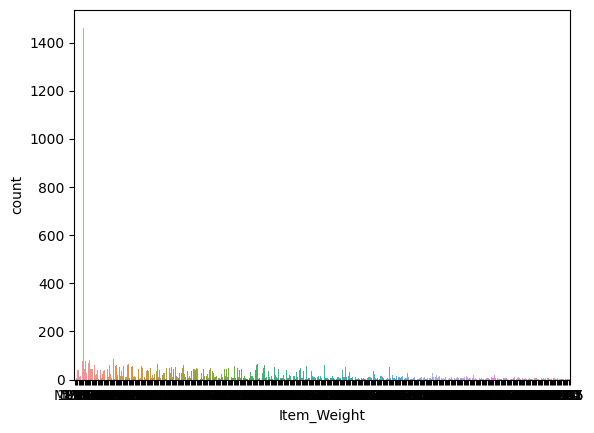

In [312]:
#Create a countplot for categorical data
# Seaborn countplot
ax = sns.countplot(data=df, x="Item_Weight")


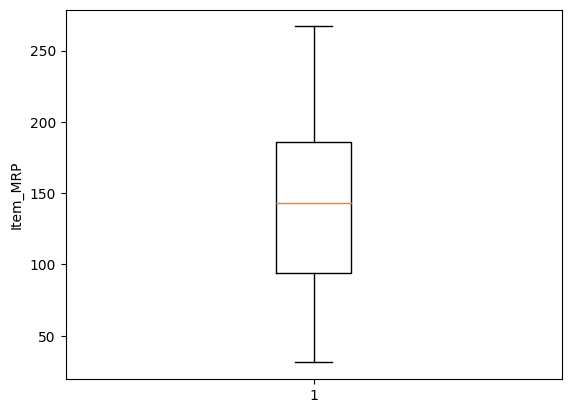

In [313]:
# create boxplot for numerical feature of dataset
fig, ax = plt.subplots()
data = df['Item_MRP']
ax.boxplot(data);
ax.set_ylabel('Item_MRP');



## Feature Inspection